# Gom cụm dữ liệu MNIST với thuật toán K-Means
Notebook này thực hiện gom cụm dữ liệu MNIST bằng thuật toán K-Means và so sánh kết quả với nhãn thực tế.

## 1. Import các thư viện cần thiết

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, adjusted_rand_score, normalized_mutual_info_score, silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
from scipy.optimize import linear_sum_assignment

STUDENT = 'Nguyễn Trần Thanh Danh - 6351071010'
print(STUDENT)
print("Đã import thành công các thư viện!")

Nguyễn Trần Thanh Danh - 6351071010
Đã import thành công các thư viện!


## 2. Tải và chuẩn bị dữ liệu MNIST

In [3]:
mnist = fetch_openml('mnist_784', version=1, parser='auto')
X, y = mnist.data, mnist.target

y = y.astype(int)

n_samples = 10000
indices = np.random.choice(len(X), n_samples, replace=False)
X_sample = X.iloc[indices] if hasattr(X, 'iloc') else X[indices]
y_sample = y.iloc[indices] if hasattr(y, 'iloc') else y[indices]

X_sample = X_sample / 255.0

print(STUDENT)
print(f"Kích thước dữ liệu: {X_sample.shape}")
print(f"Số lượng nhãn: {len(np.unique(y_sample))}")
print(f"Phân bố các nhãn:\n{pd.Series(y_sample).value_counts().sort_index()}")

Nguyễn Trần Thanh Danh - 6351071010
Kích thước dữ liệu: (10000, 784)
Số lượng nhãn: 10
Phân bố các nhãn:
class
0    1021
1    1129
2     992
3     962
4    1006
5     889
6     993
7    1073
8     973
9     962
Name: count, dtype: int64


## 3. Hiển thị một số ví dụ từ dữ liệu

Nguyễn Trần Thanh Danh - 6351071010


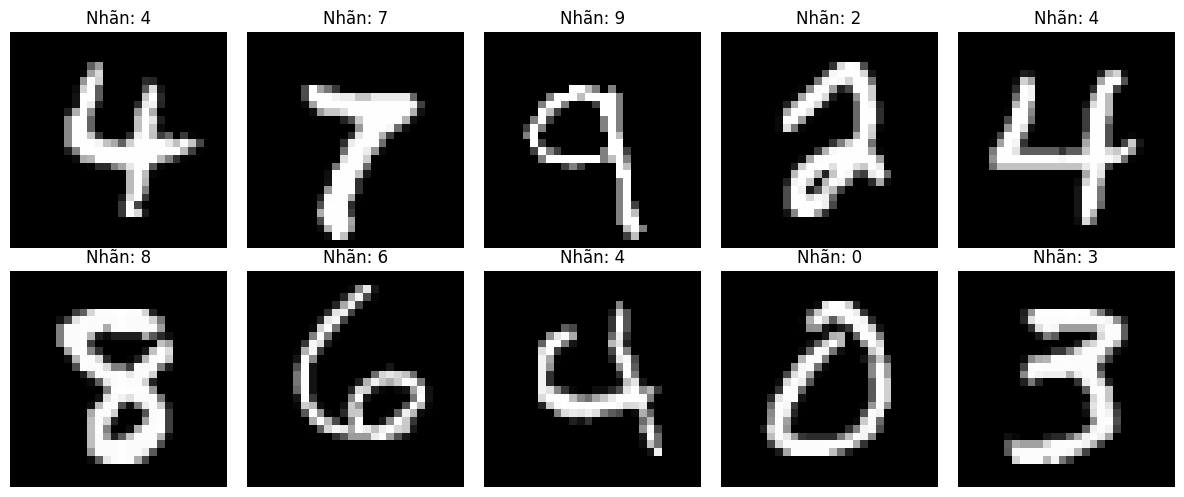

In [4]:

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    if hasattr(X_sample, 'iloc'):
        image = X_sample.iloc[i].values.reshape(28, 28)
    else:
        image = X_sample[i].reshape(28, 28)
    ax.imshow(image, cmap='gray')
    ax.set_title(f'Nhãn: {y_sample.iloc[i] if hasattr(y_sample, "iloc") else y_sample[i]}')
    ax.axis('off')
plt.tight_layout()
print(STUDENT)
plt.show()

## 4. Thực hiện thuật toán K-Means

In [5]:
n_clusters = 10

print(f"Đang thực hiện K-Means với {n_clusters} cụm...")
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10, max_iter=300, verbose=1)
cluster_labels = kmeans.fit_predict(X_sample)

print(STUDENT)
print("\nHoàn thành gom cụm!")
print(f"Inertia (tổng bình phương khoảng cách): {kmeans.inertia_:.2f}")

Đang thực hiện K-Means với 10 cụm...
Initialization complete
Iteration 0, inertia 631849.521983849.
Iteration 1, inertia 410234.8206032885.
Iteration 2, inertia 404056.19765909313.
Iteration 3, inertia 401946.23378745024.
Iteration 4, inertia 400737.5622187179.
Iteration 5, inertia 399685.00747249136.
Iteration 6, inertia 398591.62725445366.
Iteration 7, inertia 397405.77239694155.
Iteration 8, inertia 396679.7474999635.
Iteration 9, inertia 396341.0950508942.
Iteration 10, inertia 396159.9729266227.
Iteration 11, inertia 396075.7142137391.
Iteration 12, inertia 396013.44979831827.
Iteration 13, inertia 395981.15880518366.
Iteration 14, inertia 395954.8751992873.
Iteration 15, inertia 395922.5040022752.
Iteration 16, inertia 395894.65636799176.
Iteration 17, inertia 395848.3676625086.
Iteration 18, inertia 395802.85802224017.
Iteration 19, inertia 395762.9979414151.
Iteration 20, inertia 395717.4746746466.
Iteration 21, inertia 395681.79248834914.
Iteration 22, inertia 395653.180596406

## 5. Ánh xạ cụm với nhãn thực tế

In [6]:
def map_clusters_to_labels(cluster_labels, true_labels):
    """
    Ánh xạ các cụm với nhãn thực tế sử dụng Hungarian algorithm
    """
    # Tạo ma trận chi phí
    n_clusters = len(np.unique(cluster_labels))
    n_classes = len(np.unique(true_labels))
    cost_matrix = np.zeros((n_clusters, n_classes))

    for i in range(n_clusters):
        for j in range(n_classes):
            cost_matrix[i, j] = -np.sum((cluster_labels == i) & (true_labels == j))

    # Sử dụng Hungarian algorithm
    row_ind, col_ind = linear_sum_assignment(cost_matrix)

    # Tạo mapping
    mapping = {row: col for row, col in zip(row_ind, col_ind)}

    # Áp dụng mapping
    mapped_labels = np.array([mapping[label] for label in cluster_labels])

    return mapped_labels, mapping

mapped_labels, cluster_mapping = map_clusters_to_labels(cluster_labels, y_sample)

print(STUDENT)
print("Ánh xạ cụm -> nhãn:")
for cluster, label in sorted(cluster_mapping.items()):
    print(f"  Cụm {cluster} -> Chữ số {label}")

Nguyễn Trần Thanh Danh - 6351071010
Ánh xạ cụm -> nhãn:
  Cụm 0 -> Chữ số 9
  Cụm 1 -> Chữ số 4
  Cụm 2 -> Chữ số 1
  Cụm 3 -> Chữ số 0
  Cụm 4 -> Chữ số 2
  Cụm 5 -> Chữ số 5
  Cụm 6 -> Chữ số 8
  Cụm 7 -> Chữ số 7
  Cụm 8 -> Chữ số 3
  Cụm 9 -> Chữ số 6


## 6. Đánh giá kết quả gom cụm

In [7]:
# Tính các metrics
ari = adjusted_rand_score(y_sample, cluster_labels)
nmi = normalized_mutual_info_score(y_sample, cluster_labels)
silhouette = silhouette_score(X_sample, cluster_labels, sample_size=5000)
accuracy = np.mean(mapped_labels == y_sample)

print(STUDENT)
print("=" * 50)
print("KẾT QUẢ ĐÁNH GIÁ GOM CỤM")
print("=" * 50)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Accuracy (sau khi ánh xạ): {accuracy:.4f} ({accuracy*100:.2f}%)")
print("=" * 50)

Nguyễn Trần Thanh Danh - 6351071010
KẾT QUẢ ĐÁNH GIÁ GOM CỤM
Adjusted Rand Index (ARI): 0.3648
Normalized Mutual Information (NMI): 0.4940
Silhouette Score: 0.0607
Accuracy (sau khi ánh xạ): 0.5200 (52.00%)


## 7. Ma trận nhầm lẫn (Confusion Matrix)

Nguyễn Trần Thanh Danh - 6351071010


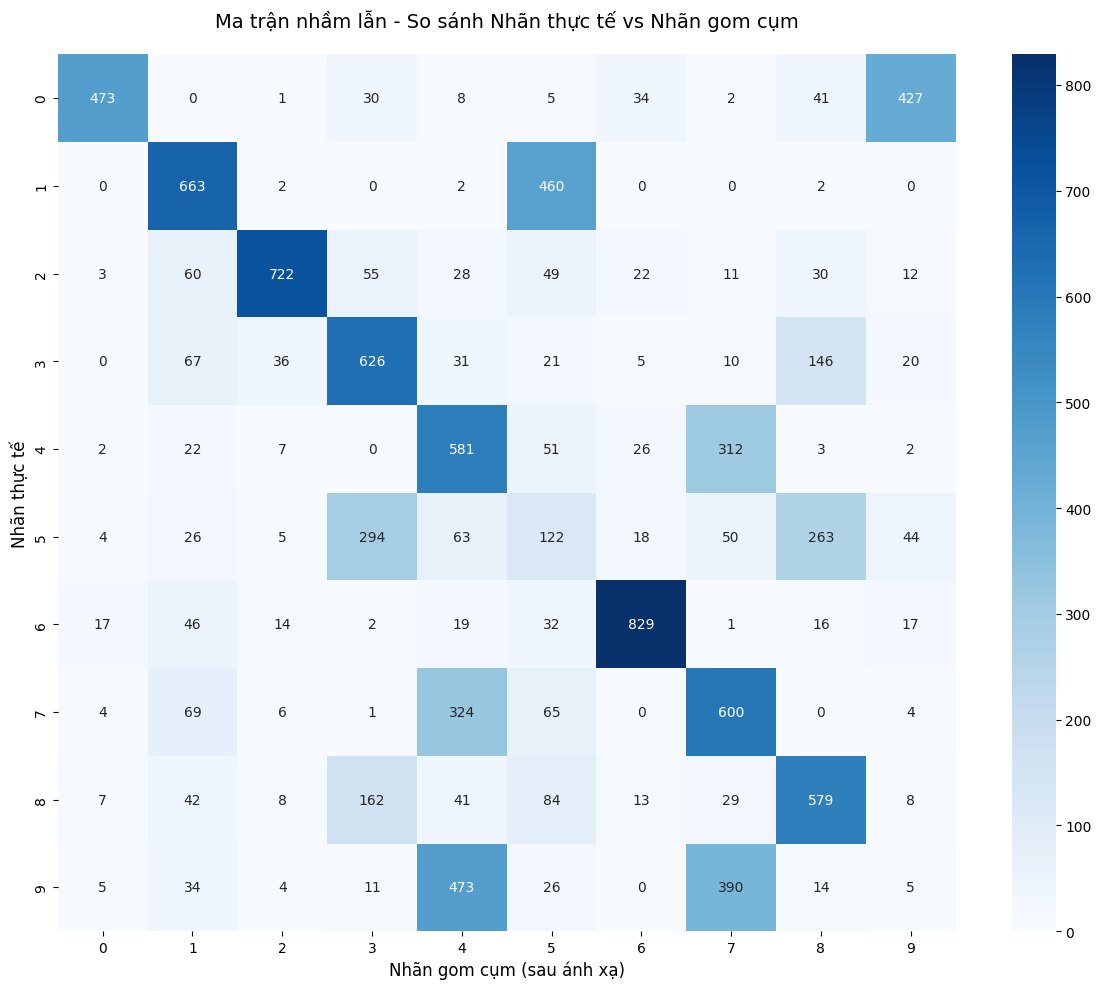

In [8]:
cm = confusion_matrix(y_sample, mapped_labels)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.title('Ma trận nhầm lẫn - So sánh Nhãn thực tế vs Nhãn gom cụm', fontsize=14, pad=20)
plt.ylabel('Nhãn thực tế', fontsize=12)
plt.xlabel('Nhãn gom cụm (sau ánh xạ)', fontsize=12)
plt.tight_layout()
print(STUDENT)
plt.show()

In [9]:
print(STUDENT)
print("\nĐộ chính xác theo từng chữ số:")
for i in range(10):
    digit_accuracy = cm[i, i] / cm[i, :].sum() if cm[i, :].sum() > 0 else 0
    print(f"  Chữ số {i}: {digit_accuracy:.4f} ({digit_accuracy*100:.2f}%)")

Nguyễn Trần Thanh Danh - 6351071010

Độ chính xác theo từng chữ số:
  Chữ số 0: 0.4633 (46.33%)
  Chữ số 1: 0.5872 (58.72%)
  Chữ số 2: 0.7278 (72.78%)
  Chữ số 3: 0.6507 (65.07%)
  Chữ số 4: 0.5775 (57.75%)
  Chữ số 5: 0.1372 (13.72%)
  Chữ số 6: 0.8348 (83.48%)
  Chữ số 7: 0.5592 (55.92%)
  Chữ số 8: 0.5951 (59.51%)
  Chữ số 9: 0.0052 (0.52%)


## 8. Trực quan hóa kết quả bằng PCA

Đang thực hiện PCA để trực quan hóa...
Nguyễn Trần Thanh Danh - 6351071010
Phương sai được giải thích: 0.1695
Nguyễn Trần Thanh Danh - 6351071010


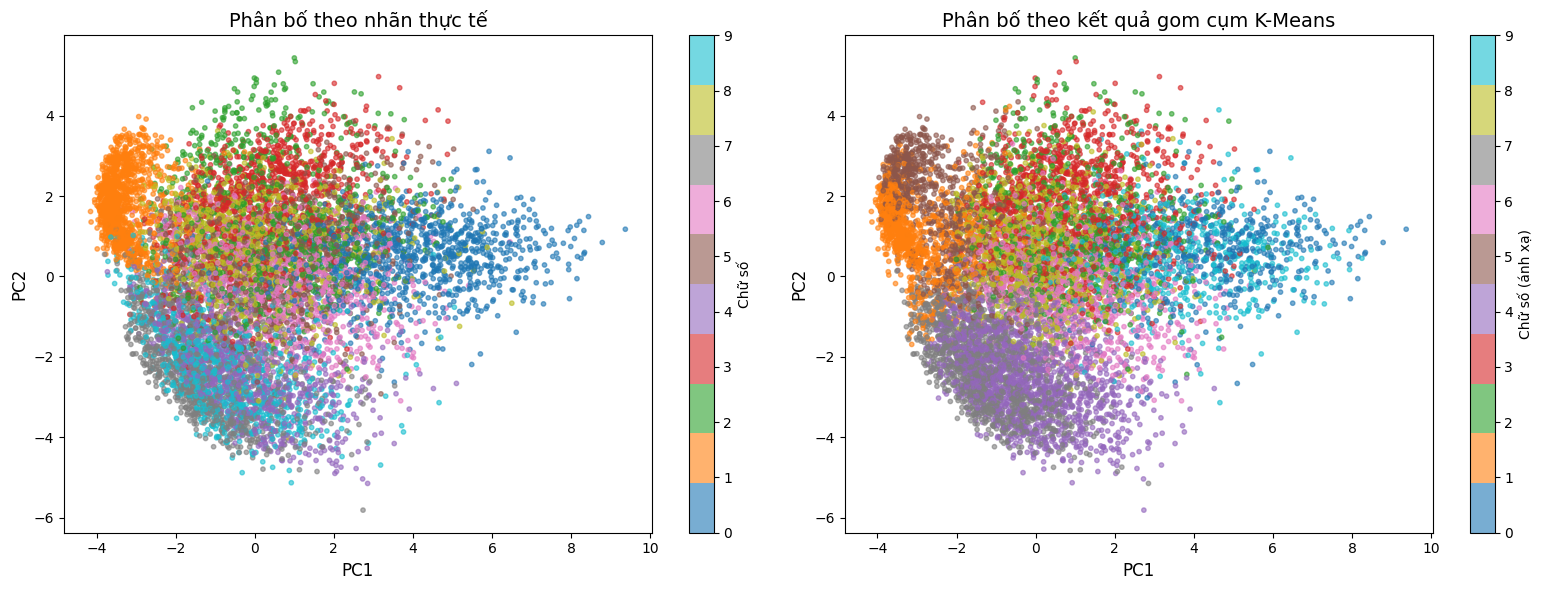

In [10]:
print("Đang thực hiện PCA để trực quan hóa...")
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_sample)

print(STUDENT)
print(f"Phương sai được giải thích: {pca.explained_variance_ratio_.sum():.4f}")

# Vẽ kết quả
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Nhãn thực tế
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_sample, cmap='tab10', alpha=0.6, s=10)
axes[0].set_title('Phân bố theo nhãn thực tế', fontsize=14)
axes[0].set_xlabel('PC1', fontsize=12)
axes[0].set_ylabel('PC2', fontsize=12)
plt.colorbar(scatter1, ax=axes[0], label='Chữ số')

# Nhãn gom cụm
scatter2 = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=mapped_labels, cmap='tab10', alpha=0.6, s=10)
axes[1].set_title('Phân bố theo kết quả gom cụm K-Means', fontsize=14)
axes[1].set_xlabel('PC1', fontsize=12)
axes[1].set_ylabel('PC2', fontsize=12)
plt.colorbar(scatter2, ax=axes[1], label='Chữ số (ánh xạ)')

plt.tight_layout()
print(STUDENT)
plt.show()

## 9. Hiển thị ví dụ từ mỗi cụm

Nguyễn Trần Thanh Danh - 6351071010


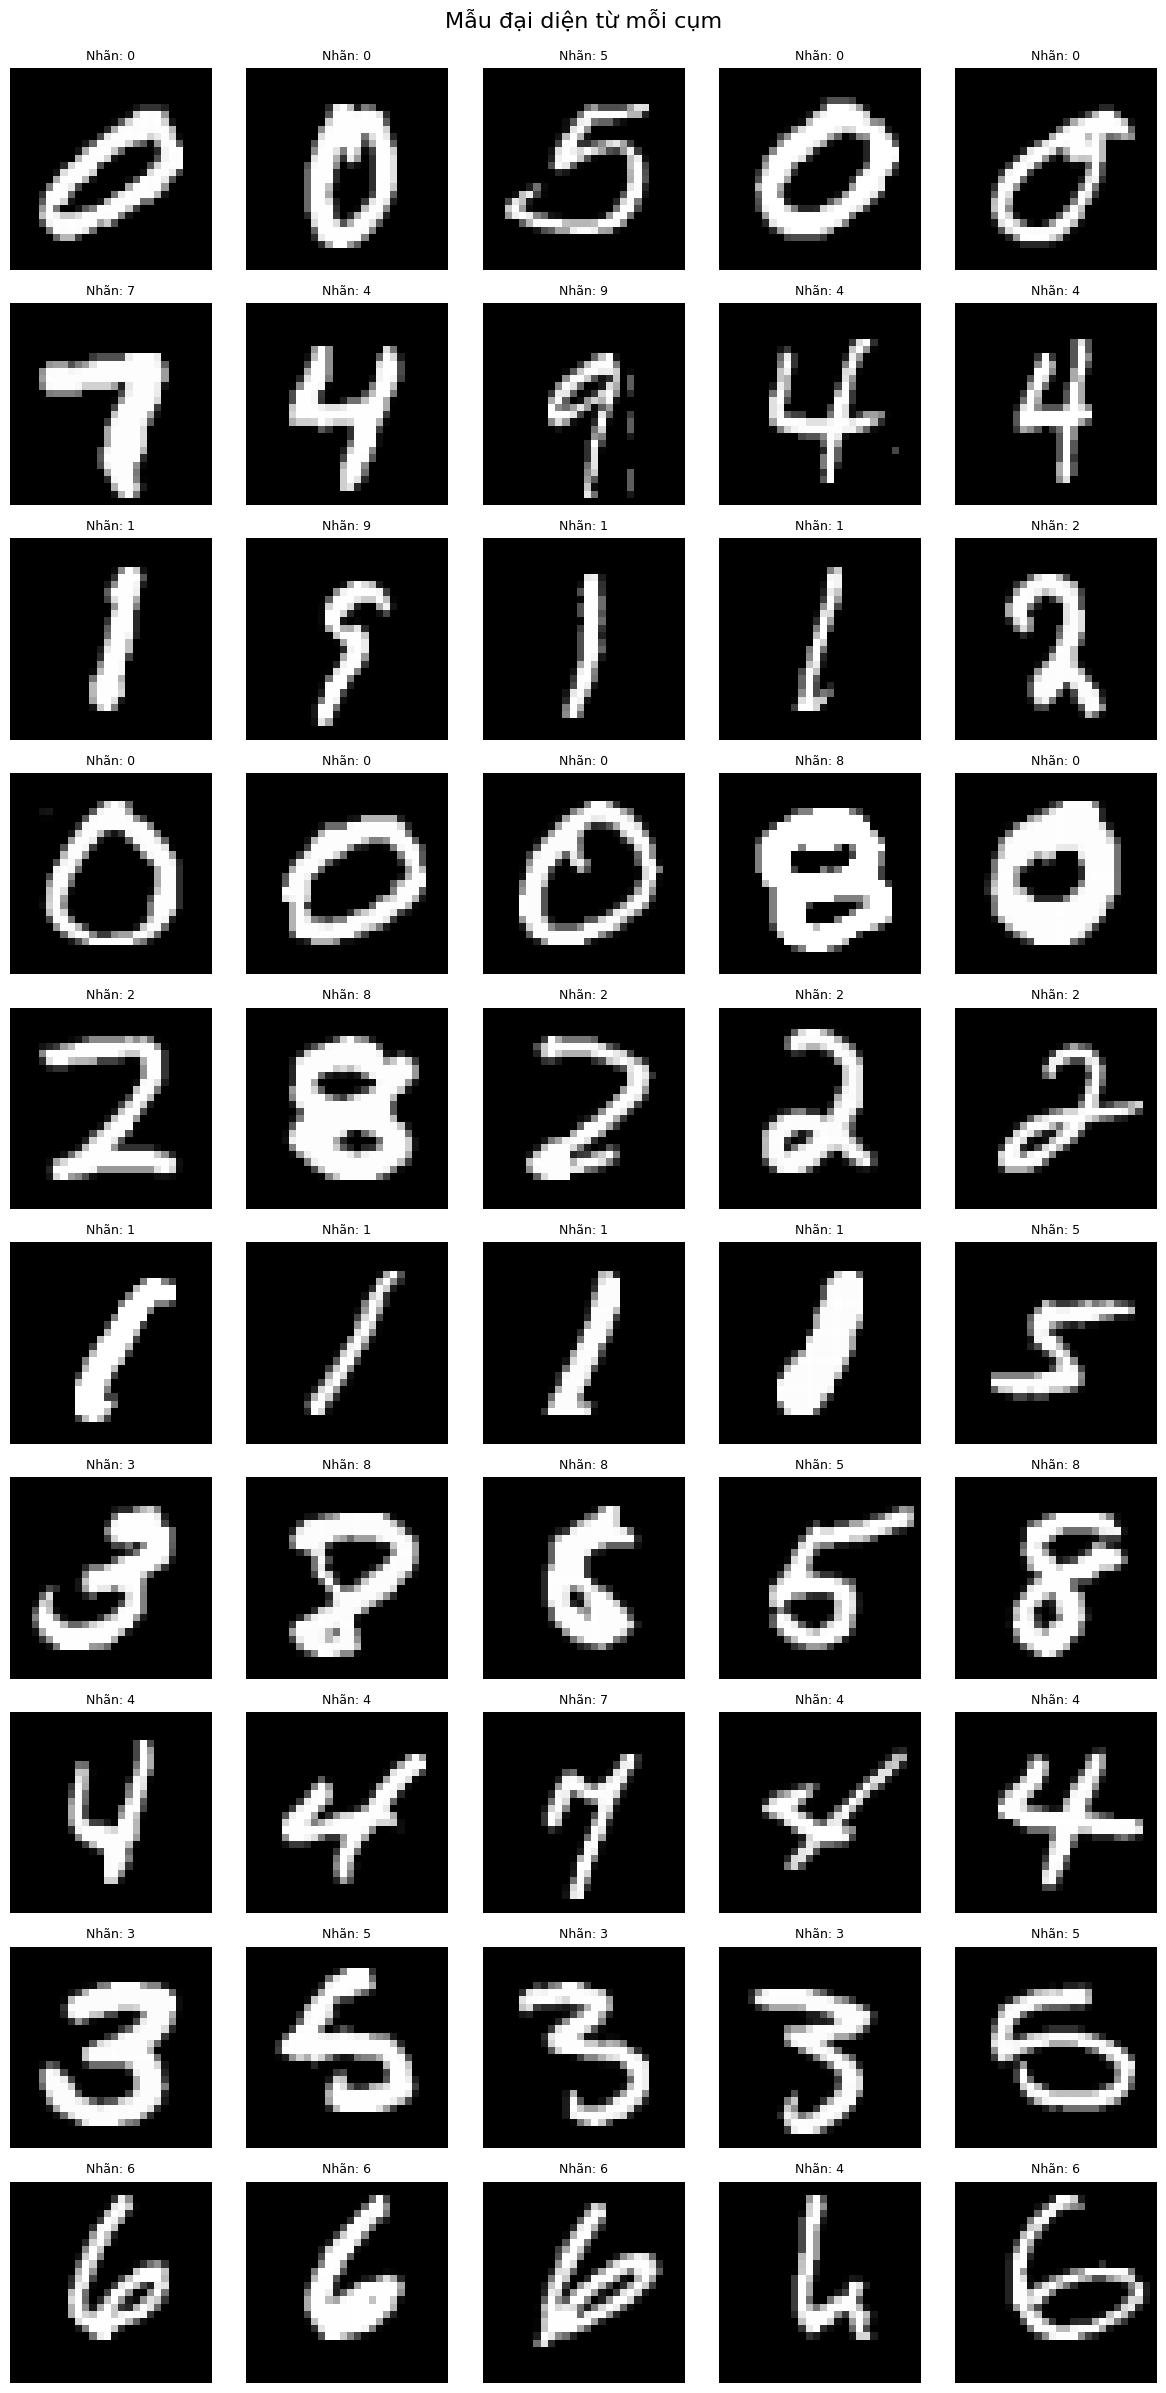

In [11]:
fig, axes = plt.subplots(10, 5, figsize=(12, 24))

for cluster in range(10):
    # Lấy các indices của cụm hiện tại
    cluster_indices = np.where(cluster_labels == cluster)[0]

    # Lấy 5 mẫu ngẫu nhiên
    sample_indices = np.random.choice(cluster_indices, min(5, len(cluster_indices)), replace=False)

    for i, idx in enumerate(sample_indices):
        if hasattr(X_sample, 'iloc'):
            image = X_sample.iloc[idx].values.reshape(28, 28)
        else:
            image = X_sample[idx].reshape(28, 28)

        axes[cluster, i].imshow(image, cmap='gray')
        true_label = y_sample.iloc[idx] if hasattr(y_sample, 'iloc') else y_sample[idx]
        axes[cluster, i].set_title(f'Nhãn: {true_label}', fontsize=9)
        axes[cluster, i].axis('off')

    # Thêm label cho cụm
    axes[cluster, 0].set_ylabel(f'Cụm {cluster}\n(→{cluster_mapping[cluster]})',
                                fontsize=10, rotation=0, labelpad=40, va='center')

plt.suptitle('Mẫu đại diện từ mỗi cụm', fontsize=16, y=0.995)
plt.tight_layout()
print(STUDENT)
plt.show()

## 10. Phân tích các lỗi gom cụm

Số lượng mẫu bị gom cụm sai: 4800/10000 (48.00%)
Nguyễn Trần Thanh Danh - 6351071010


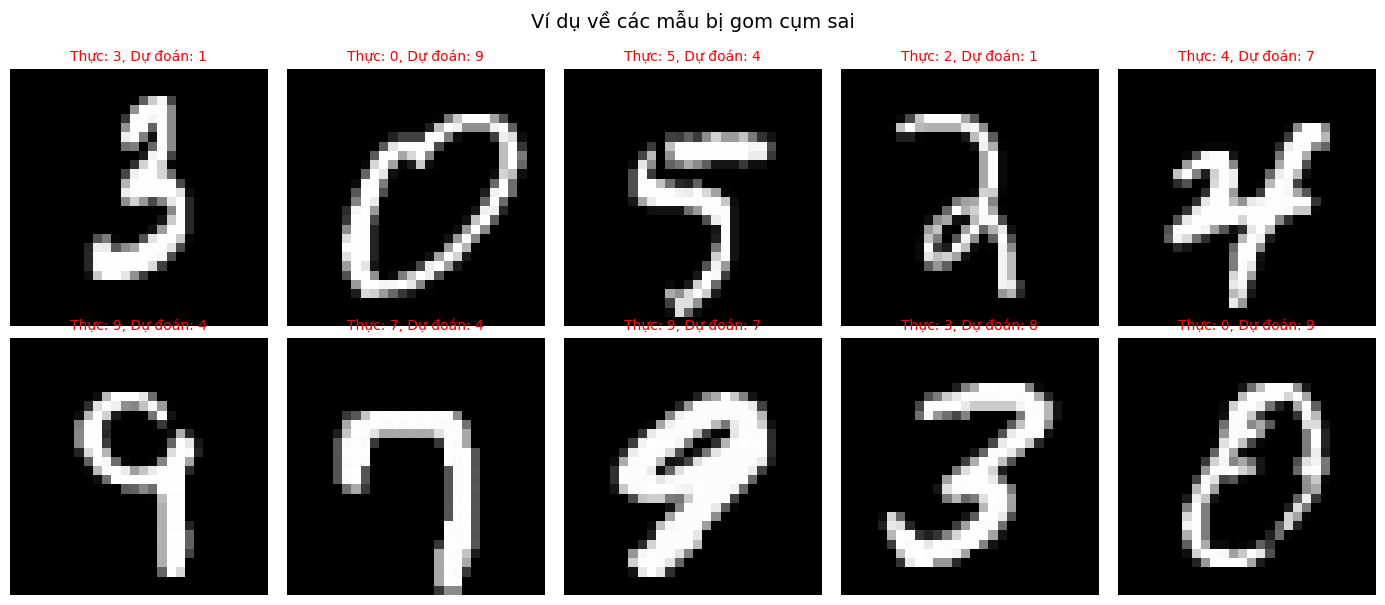

In [12]:
misclassified = mapped_labels != y_sample
n_misclassified = np.sum(misclassified)

print(f"Số lượng mẫu bị gom cụm sai: {n_misclassified}/{len(y_sample)} ({n_misclassified/len(y_sample)*100:.2f}%)")

# Hiển thị 10 ví dụ bị gom cụm sai
if n_misclassified > 0:
    misclassified_indices = np.where(misclassified)[0]
    sample_misclassified = np.random.choice(misclassified_indices, min(10, n_misclassified), replace=False)

    fig, axes = plt.subplots(2, 5, figsize=(14, 6))
    for i, idx in enumerate(sample_misclassified):
        ax = axes[i // 5, i % 5]
        if hasattr(X_sample, 'iloc'):
            image = X_sample.iloc[idx].values.reshape(28, 28)
        else:
            image = X_sample[idx].reshape(28, 28)

        ax.imshow(image, cmap='gray')
        true_label = y_sample.iloc[idx] if hasattr(y_sample, 'iloc') else y_sample[idx]
        pred_label = mapped_labels[idx]
        ax.set_title(f'Thực: {true_label}, Dự đoán: {pred_label}', fontsize=10, color='red')
        ax.axis('off')

    plt.suptitle('Ví dụ về các mẫu bị gom cụm sai', fontsize=14, y=1.00)
    plt.tight_layout()
    print(STUDENT)
    plt.show()

## 11. Tổng kết

In [13]:
print(STUDENT)
print("\n" + "="*60)
print("TỔNG KẾT KẾT QUẢ GOM CỤM K-MEANS TRÊN DỮ LIỆU MNIST")
print("="*60)
print(f"\nSố mẫu sử dụng: {n_samples}")
print(f"Số cụm (K): {n_clusters}")
print(f"\nCác chỉ số đánh giá:")
print(f"  - Độ chính xác: {accuracy*100:.2f}%")
print(f"  - Adjusted Rand Index: {ari:.4f}")
print(f"  - Normalized Mutual Information: {nmi:.4f}")
print(f"  - Silhouette Score: {silhouette:.4f}")
print(f"\nKết luận:")
print(f"  K-Means đã gom cụm {'tốt' if accuracy > 0.7 else 'khá' if accuracy > 0.5 else 'cần cải thiện'} ")
print(f"  trên dữ liệu MNIST với độ chính xác {accuracy*100:.2f}%.")
print(f"  Thuật toán có thể phân biệt được các chữ số khác nhau")
print(f"  dựa trên đặc trưng hình ảnh mà không cần nhãn.")
print("="*60)

Nguyễn Trần Thanh Danh - 6351071010

TỔNG KẾT KẾT QUẢ GOM CỤM K-MEANS TRÊN DỮ LIỆU MNIST

Số mẫu sử dụng: 10000
Số cụm (K): 10

Các chỉ số đánh giá:
  - Độ chính xác: 52.00%
  - Adjusted Rand Index: 0.3648
  - Normalized Mutual Information: 0.4940
  - Silhouette Score: 0.0607

Kết luận:
  K-Means đã gom cụm khá 
  trên dữ liệu MNIST với độ chính xác 52.00%.
  Thuật toán có thể phân biệt được các chữ số khác nhau
  dựa trên đặc trưng hình ảnh mà không cần nhãn.
